# Amazon Health & Personal Care Review Data 

### Required Libraries

In [1]:
import json
import csv
from nltk.corpus import stopwords
import string
import nltk
import matplotlib.pyplot as plt
%matplotlib inline 


### Loading json file as pandas dataframe

In [2]:
#reference for lines=True: https://www.statology.org/valueerror-trailing-data/
import pandas as pd
with open('amazon_review.json') as inputfile:
    df = pd.read_json(inputfile,lines=True)

df.head(5)


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,ALC5GH8CAMAI7,159985130X,AnnN,"[1, 1]",This is a great little gadget to have around. ...,5,Handy little gadget,1294185600,"01 5, 2011"
1,AHKSURW85PJUE,159985130X,"AZ buyer ""AZ buyer""","[1, 1]",I would recommend this for a travel magnifier ...,4,Small & may need to encourage battery,1329523200,"02 18, 2012"
2,A38RMU1Y5TDP9,159985130X,"Bob Tobias ""Robert Tobias""","[75, 77]",What I liked was the quality of the lens and t...,4,Very good but not great,1275955200,"06 8, 2010"
3,A1XZUG7DFXXOS4,159985130X,Cat lover,"[56, 60]",Love the Great point light pocket magnifier! ...,4,great addition to your purse,1202428800,"02 8, 2008"
4,A1MS3M7M7AM13X,159985130X,Cricketoes,"[1, 1]",This is very nice. You pull out on the magnifi...,5,Very nice and convenient.,1313452800,"08 16, 2011"


In [3]:
review_csv = df.to_csv('amazon_review_csv.csv', encoding='utf-8', index=False)

In [39]:
df.isnull().sum()

reviewerID           0
asin                 0
reviewerName      3051
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
length_review        0
Date                 0
dtype: int64

### Data Analysis and Visualization

In [4]:
#count no. of reviews based on overall rating (Reference: https://iu.instructure.com/courses/2058564/files/130487187?module_item_id=25365363&fd_cookie_set=1)

n1=pd.DataFrame(df['overall'].value_counts())
n1


,overall
5,211633
4,68168
3,33254
2,16754
1,16546


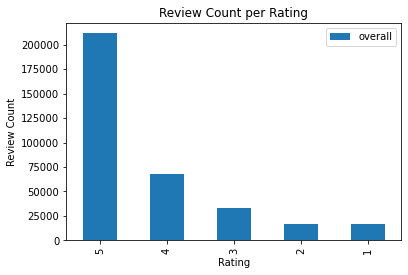

In [38]:
plot = n1.plot(kind='bar')
plt.title('Review Count per Rating')
plot.set_xlabel("Rating")
plot.set_ylabel("Review Count")
plt.show()

In [13]:
# products with highest rating (Reference: https://iu.instructure.com/courses/2058564/files/130487187?module_item_id=25365363&fd_cookie_set=1)
cal2=df.iloc[:,[1,5]]

n2=pd.DataFrame(cal2.groupby('asin')['overall'].mean())

high_rate1 = n2.sort_values(by=['overall'], ascending=False).nlargest(10, 'overall')
high_rate1


,overall
asin,
B000I4AIUA,5.0
B005XIDPFQ,5.0
B00FH0WUQ0,5.0
B00FH1CO9M,5.0
B000FP04CO,5.0
B001O5T4LQ,5.0
B005XQWVI0,5.0
B005XJCUSI,5.0
B005XCX84K,5.0


In [15]:
# Calculate length of review
df['length_review']=[len(r) for r in df['reviewText']]

# Define positive and negative review
positive = df[df.overall>=3.5]['reviewText']
negative =df[df.overall<3.5]['reviewText']


In [18]:
print("Total positive reviews are:",len(positive))

279801

In [21]:
print("Total negative reviews are:",len(negative))

Total negative reviews are: 66554


In [30]:
# Mean review length for every rating
n4=pd.DataFrame(df.groupby('overall')['length_review'].mean())

high_rate4 = n4.sort_values(by=['length_review'], ascending=False)
high_rate4

,length_review
overall,
4,607.854976
3,599.108919
2,583.640444
1,533.546597
5,464.339295


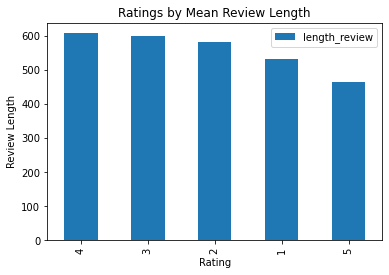

In [37]:
# Bar Chart for mean review length for every rating
plot = high_rate4.plot(kind='bar',label='Review Length')
plt.title('Ratings by Mean Review Length')
plot.set_xlabel("Rating")
plot.set_ylabel("Review Length")
#plt.savefig('Best Reviewed.png')
plt.show()

In [7]:
# products with highest purchase rate (Reference: https://iu.instructure.com/courses/2058564/files/130487187?module_item_id=25365363&fd_cookie_set=1)

n3=pd.DataFrame(cal2['asin'].value_counts())
#n3
high_rate2 = n3.sort_values(by='asin', ascending=False).nlargest(10, 'asin')
high_rate2


,asin
B0037KMI0U,1089
B0010JLMO8,767
B001KXZ808,699
B0049LUI9O,528
B000GIPJY8,475
B001F51VRK,469
B000NL0T1G,434
B001F51VS4,431
B004YHKUXC,427
B007UZNS5W,422


In [32]:
#df.reviewTime
df['Date'] = pd.to_datetime(df.reviewTime)

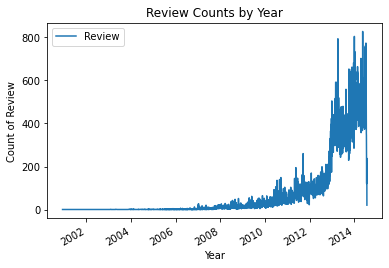

In [35]:
# Review Counts by Year

plt.title('Review Counts by Year')
plt.ylabel('Count of Review')
plt.xlabel('Year',fontsize=10)
df['Date'].value_counts().plot(label='Review')
plt.legend()
plt.show()

### Sentiment Analysis of words using sentinet

In [40]:
#Remove punctuations (Referrence: https://www.codegrepper.com/code-examples/python/remove+punctuation+in+dataframe+column)
def punc_rem(string1):
    for sym in string.punctuation:
        string1 = string1.replace(sym, '')
    return string1

df['review_no_punc'] = df['reviewText'].apply(punc_rem)

In [41]:
#Remove stopwords (Referrence: https://medium.com/swlh/natural-language-processing-nlp-analysis-with-amazon-review-data-part-i-data-engineering-6573b782e4dc)
from nltk.corpus import stopwords
stop = stopwords.words('english')
def tokens_word(word):
    tokens = nltk.word_tokenize(word)
    new_word = [token.lower() for token in tokens if token.lower() not in stop]
    return new_word

#processed_data= df['review_no_punc'].apply(lambda x: [item for item in x if item not in stop])
tokenized_word = list(map(tokens_word,df.review_no_punc))
len(tokenized_word)


346355

In [42]:
#tokenized_word

[['great',
  'little',
  'gadget',
  'around',
  'weve',
  'already',
  'used',
  'look',
  'splinters',
  'uses',
  'light',
  'great',
  'handy',
  'size',
  'however',
  'wish',
  'id',
  'bought',
  'one',
  'little',
  'higher',
  'magnification'],
 ['would',
  'recommend',
  'travel',
  'magnifier',
  'occasional',
  'readingi',
  'read',
  'another',
  'review',
  'magnifier',
  'problem',
  'light',
  'coming',
  'find',
  'one',
  'appeared',
  'doa',
  'box',
  'opening',
  'shutting',
  'viewer',
  'turn',
  'light',
  'light',
  'began',
  'come',
  'several',
  'times',
  'light',
  'appears',
  'coming',
  'timeit',
  'small',
  'taking',
  'someplace',
  'reading',
  'things',
  'like',
  'menu',
  'dark',
  'corner',
  'restaurant',
  'great'],
 ['liked',
  'quality',
  'lens',
  'built',
  'light',
  'lens',
  'discernable',
  'distortion',
  'anywhere',
  'magnified',
  'everything',
  'evenly',
  'without',
  'ripples',
  'distortion',
  'ive',
  'seen',
  'low',
  '

In [43]:
from nltk.corpus import sentiwordnet as swn 

In [44]:
list_pos_tokens=[]
for x in tokenized_word:
    #print(x)
    pos_tokens = nltk.tag.pos_tag(x)
    list_pos_tokens.append(pos_tokens)
    #print(pos_tokens)
len(list_pos_tokens)

346355

In [45]:
#wordnet and lemma part referred: https://www.guru99.com/stemming-lemmatization-python-nltk.html and Assignment 4

from nltk.corpus import wordnet 
from nltk.corpus import sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
def conv(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    elif tag.startswith('V'):
        return wordnet.VERB
    return None
score = 0.0
lemmatizer = WordNetLemmatizer()
for i in list_pos_tokens:
    for word, tag in i:
        #print(word, tag)
        word_t = conv(tag)
        if word_t not in (wordnet.NOUN, wordnet.ADJ, wordnet.ADV):
            continue 
        lemma = lemmatizer.lemmatize(word, pos=word_t)
        synsets = wordnet.synsets(lemma, pos=word_t)
        if not synsets:
            continue
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        #print(swn_synset) 
        score += swn_synset.pos_score() - swn_synset.neg_score()
print (score)

288960.8889999987


In [46]:
#Sentiment analysis of first 100 reviews (As the original data is large Jupyter Notebook became unresponsive while executing the code)
small_tokenized_word=tokenized_word[:100]


In [47]:
small_tokenized_word

[['great',
  'little',
  'gadget',
  'around',
  'weve',
  'already',
  'used',
  'look',
  'splinters',
  'uses',
  'light',
  'great',
  'handy',
  'size',
  'however',
  'wish',
  'id',
  'bought',
  'one',
  'little',
  'higher',
  'magnification'],
 ['would',
  'recommend',
  'travel',
  'magnifier',
  'occasional',
  'readingi',
  'read',
  'another',
  'review',
  'magnifier',
  'problem',
  'light',
  'coming',
  'find',
  'one',
  'appeared',
  'doa',
  'box',
  'opening',
  'shutting',
  'viewer',
  'turn',
  'light',
  'light',
  'began',
  'come',
  'several',
  'times',
  'light',
  'appears',
  'coming',
  'timeit',
  'small',
  'taking',
  'someplace',
  'reading',
  'things',
  'like',
  'menu',
  'dark',
  'corner',
  'restaurant',
  'great'],
 ['liked',
  'quality',
  'lens',
  'built',
  'light',
  'lens',
  'discernable',
  'distortion',
  'anywhere',
  'magnified',
  'everything',
  'evenly',
  'without',
  'ripples',
  'distortion',
  'ive',
  'seen',
  'low',
  '

In [48]:
list_pos_tokens_small=[]
for x in small_tokenized_word:
    #print(x)
    small_pos_tokens=nltk.tag.pos_tag(x)
    list_pos_tokens_small.append(small_pos_tokens)
    #print(small_pos_tokens)
len(list_pos_tokens_small)
#print(list_pos_tokens)

100

In [49]:
score = 0.0
lemmatizer = WordNetLemmatizer()
for i in list_pos_tokens_small:
    for word, tag in i:
        #print(word, tag)
        word_t = conv(tag)
        if word_t not in (wordnet.NOUN, wordnet.ADJ, wordnet.ADV):
            continue 
        lemma = lemmatizer.lemmatize(word, pos=word_t)
        synsets = wordnet.synsets(lemma, pos=word_t)
        if not synsets:
            continue
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        print(swn_synset) 
        score += swn_synset.pos_score() - swn_synset.neg_score()
print (score)

<great.s.01: PosScore=0.0 NegScore=0.0>
<small.a.01: PosScore=0.0 NegScore=0.375>
<appliance.n.01: PosScore=0.0 NegScore=0.0>
<already.r.01: PosScore=0.125 NegScore=0.0>
<expression.n.01: PosScore=0.0 NegScore=0.0>
<splinter.n.01: PosScore=0.0 NegScore=0.0>
<light.a.01: PosScore=0.0 NegScore=0.25>
<great.s.01: PosScore=0.0 NegScore=0.0>
<handy.s.01: PosScore=0.125 NegScore=0.125>
<size.n.01: PosScore=0.125 NegScore=0.375>
<however.r.01: PosScore=0.125 NegScore=0.5>
<idaho.n.01: PosScore=0.0 NegScore=0.0>
<small.a.01: PosScore=0.0 NegScore=0.375>
<high.a.01: PosScore=0.125 NegScore=0.25>
<magnification.n.01: PosScore=0.0 NegScore=0.0>
<travel.n.01: PosScore=0.0 NegScore=0.0>
<occasional.s.01: PosScore=0.0 NegScore=0.0>
<reappraisal.n.01: PosScore=0.125 NegScore=0.0>
<magnifier.n.01: PosScore=0.0 NegScore=0.0>
<problem.n.01: PosScore=0.0 NegScore=0.625>
<light.n.01: PosScore=0.0 NegScore=0.0>
<box.n.01: PosScore=0.0 NegScore=0.0>
<spectator.n.01: PosScore=0.25 NegScore=0.0>
<bend.n.01: P

<evaluation.n.02: PosScore=0.0 NegScore=0.0>
<pleased.a.01: PosScore=0.625 NegScore=0.0>
<highly.r.01: PosScore=0.625 NegScore=0.0>
<high.a.01: PosScore=0.125 NegScore=0.25>
<evaluation.n.02: PosScore=0.0 NegScore=0.0>
<person.n.01: PosScore=0.0 NegScore=0.0>
<battery.n.01: PosScore=0.0 NegScore=0.0>
<long.r.01: PosScore=0.0 NegScore=0.0>
<difficult.a.01: PosScore=0.0 NegScore=0.75>
<canon.n.01: PosScore=0.0 NegScore=0.0>
<digital.a.01: PosScore=0.125 NegScore=0.0>
<camera.n.01: PosScore=0.0 NegScore=0.0>
<charge.n.01: PosScore=0.0 NegScore=0.0>
<charge.n.01: PosScore=0.0 NegScore=0.0>
<easy.a.01: PosScore=0.625 NegScore=0.25>
<amazing.s.02: PosScore=0.875 NegScore=0.125>
<battery.n.01: PosScore=0.0 NegScore=0.0>
<never.r.01: PosScore=0.0 NegScore=0.625>
<regular.a.01: PosScore=0.0 NegScore=0.0>
<energizer.n.01: PosScore=0.125 NegScore=0.0>
<set.n.01: PosScore=0.125 NegScore=0.0>
<strong.a.01: PosScore=0.5 NegScore=0.0>
<last.s.01: PosScore=0.0 NegScore=0.25>
<much.a.01: PosScore=0.0 N

In [ ]:
#Other References:
# https://www.machinelearningplus.com/pandas/pandas-line-plot/
# https://medium.com/swlh/natural-language-processing-nlp-analysis-with-amazon-review-data-part-i-data-engineering-6573b782e4dc
# Referred for ideas (https://github.com/melanieshi0120/NLP_Analysis_Amazon_Reviews/blob/master/Amazon_sport_product_review.ipynb)